In [ ]:
#importing the basic librairies
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import scipy

# Visualization 
import matplotlib.pyplot as plt
import missingno #missing values , deal with text
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model




# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [ ]:
df=pd.read_csv('covid19_tweets.csv')

In [ ]:
df.head()

user_name         user_location  \
0  ᏉᎥ☻լꂅϮ           astroworld             
1  Tom Basile 🇺🇸    New York, NY           
2  Time4fisticuffs  Pewee Valley, KY       
3  ethel mertz      Stuck in the Middle    
4  DIPR-J&K         Jammu and Kashmir      

                                                                                                                                            user_description  \
0  wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙                                                                             
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020                               
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist                                                                                                       
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir                                                        

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42  624             950           18775             
1  2009-04-16 20:06:23  2253            1677          24                
2  2009-02-28 18:57:41  9275            9525          7254              
3  2019-03-07 01:45:06  197             987           1488              
4  2017-02-12 06:45:15  101009          168           101               

   user_verified                 date  \
0  False          2020-07-25 12:27:21   
1  True           2020-07-25 12:27:17   
2  False          2020-07-25 12:27:14   
3  False          2020-07-25 12:27:10   
4  False          2020-07-25 12:27:08   

                                                                                                                                           text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW    
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh    

                            hashtags               source  is_retweet  
0  NaN                                Twitter for iPhone   False       
1  NaN                                Twitter for Android  False       
2  ['COVID19']                        Twitter for Android  False       
3  ['COVID19']                        Twitter for iPhone   False       
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android  False

<b>Common data cleaning steps on all text:</b> <br>
Make text all lower case <br>
Remove punctuation <br>
Remove numerical values<br>
Remove common non-sensical text (/n)<br>
Tokenize text<br>
Remove stop words<br>

<b>More data cleaning steps after tokenization:</b>

Stemming / lemmatization <br>
Parts of speech tagging<br>
Create bi-grams or tri-grams<br>
Deal with typos<br>
And more...

In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers      int64 
user_friends        int64 
user_favourites     int64 
user_verified       bool  
date                object
text                object
hashtags            object
source              object
is_retweet          bool  
dtype: object

In [ ]:
#Retrieve the source of all the tweets => some retweets may also be present
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [ ]:
df['source'].value_counts()

Twitter Web App          56891
Twitter for Android      40179
Twitter for iPhone       35472
TweetDeck                8543 
Hootsuite Inc.           7321 
                         ...  
Newswise Expert Pitch    1    
twmode                   1    
VA COVID-19 Updates      1    
Ontario_Covid19          1    
Emma Social Connector    1    
Name: source, Length: 610, dtype: int64

In [ ]:
#pour une visualisation, plot the largest ones
df['source'].value_counts().nlargest(36)

Twitter Web App                   56891
Twitter for Android               40179
Twitter for iPhone                35472
TweetDeck                         8543 
Hootsuite Inc.                    7321 
Twitter for iPad                  4336 
Buffer                            2728 
Sprout Social                     1833 
Instagram                         1759 
IFTTT                             1545 
dlvr.it                           681  
GlobalPandemic.NET                679  
LinkedIn                          628  
COVID19-Updates                   625  
Twitter Media Studio              596  
WordPress.com                     537  
HubSpot                           513  
Sprinklr                          497  
FS Poster                         414  
Dynamic Signal                    391  
Resistbot Open Letters            390  
Cheap Bots, Done Quick!           335  
Paper.li                          322  
Twitter for Advertisers           317  
Blood Donors India                281  


<AxesSubplot:>

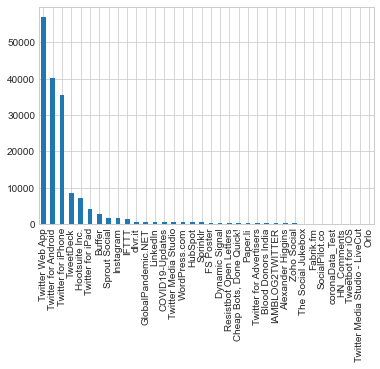

In [ ]:
#pour une visualisation, plot the largest ones
df['source'].value_counts().nlargest(36).plot(kind='bar')

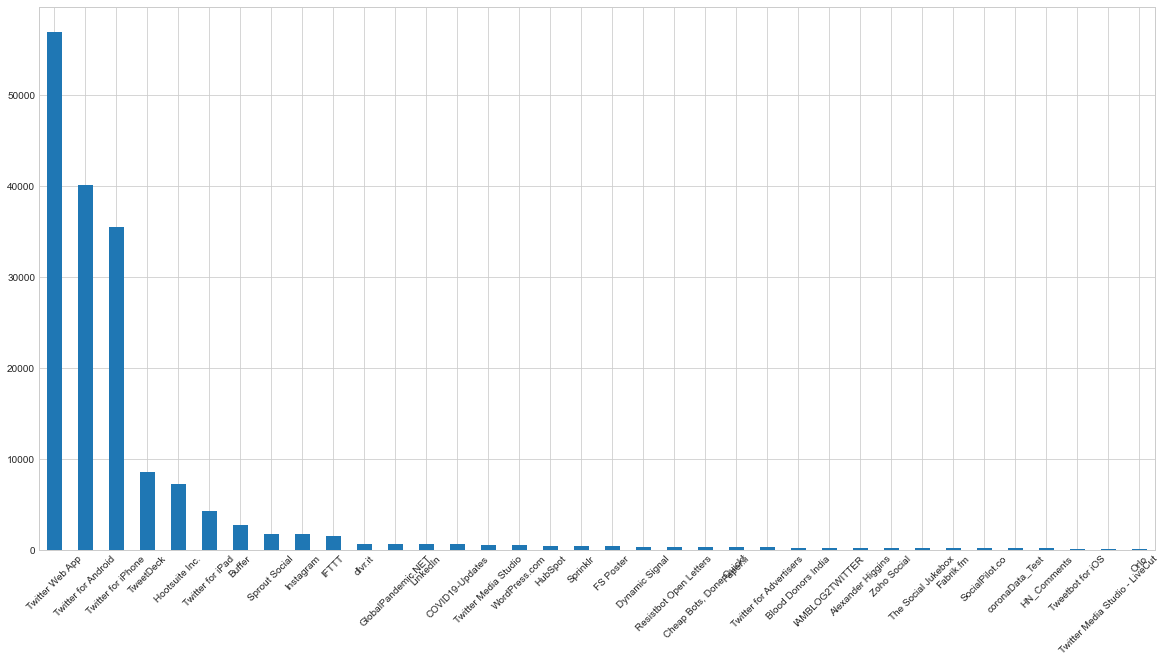

In [ ]:
#pour une visualisation, plot the largest ones
plt.figure(figsize=(20.,10))
df['source'].value_counts().nlargest(36).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

## Preprocessing

<b> Text Analysis </b> <br>
install neattext => https://pypi.org/project/neattext/

In [ ]:
import neattext.functions as nfx
#List all the methodes
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
#Nous voulons que le tweet, donc nous allons travailler avec seulement la colonne text
df['text']

0         If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0      
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu      
2         @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3      
3         @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW       
4         25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh       
                                                                             ...                                                                            
179103    Thanks @IamOhmai for nominating me for the @WHO 

As we can see , there is a lot to clean <br>
for that , we are going to clean all the noise <br>
<br>
<b>Noise</b> <br>
remove mentions/userhandles<br>
remove hashtags<br>
urls<br>
emojis<br>
special char

In [ ]:
df.head()

user_name         user_location  \
0  ᏉᎥ☻լꂅϮ           astroworld             
1  Tom Basile 🇺🇸    New York, NY           
2  Time4fisticuffs  Pewee Valley, KY       
3  ethel mertz      Stuck in the Middle    
4  DIPR-J&K         Jammu and Kashmir      

                                                                                                                                            user_description  \
0  wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙                                                                             
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020                               
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist                                                                                                       
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir                                                        

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42  624             950           18775             
1  2009-04-16 20:06:23  2253            1677          24                
2  2009-02-28 18:57:41  9275            9525          7254              
3  2019-03-07 01:45:06  197             987           1488              
4  2017-02-12 06:45:15  101009          168           101               

   user_verified                 date  \
0  False          2020-07-25 12:27:21   
1  True           2020-07-25 12:27:17   
2  False          2020-07-25 12:27:14   
3  False          2020-07-25 12:27:10   
4  False          2020-07-25 12:27:08   

                                                                                                                                           text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW    
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh    

                            hashtags               source  is_retweet  
0  NaN                                Twitter for iPhone   False       
1  NaN                                Twitter for Android  False       
2  ['COVID19']                        Twitter for Android  False       
3  ['COVID19']                        Twitter for iPhone   False       
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android  False

In [ ]:
#tokenize the text before cleaning
from nltk.tokenize import TweetTokenizer 
from nltk.tokenize import word_tokenize

tknzr = TweetTokenizer()
df['tokenbfcleaning'] = df['text'].apply(tknzr.tokenize)


In [ ]:
df['tokenbfcleaning'].head(7)

0    [If, I, smelled, the, scent, of, hand, sanitizers, today, on, someone, in, the, past, ,, I, would, think, they, were, so, intoxicated, that, …, https://t.co/QZvYbrOgb0]
1    [Hey, @Yankees, @YankeesPR, and, @MLB, -, wouldn't, it, have, made, more, sense, to, have, the, players, pay, their, respects, to, the, A, …, https://t.co/1QvW0zgyPu]  
2    [@diane3443, @wdunlap, @realDonaldTrump, Trump, never, once, claimed, #COVID19, was, a, hoax, ., We, all, claim, that, this, effort, to, …, https://t.co/Jkk8vHWHb3]    
3    [@brookbanktv, The, one, gift, #COVID19, has, give, me, is, an, appreciation, for, the, simple, things, that, were, always, around, me, …, https://t.co/Z0pOAlFXcW]     
4    [25, July, :, Media, Bulletin, on, Novel, #CoronaVirusUpdates, #COVID19, @kansalrohit69, @DrSyedSehrish, @airnewsalerts, @ANI, …, https://t.co/MN0EEcsJHh]              
5    [#coronavirus, #covid19, deaths, continue, to, rise, ., It's, almost, as, bad, as, it, ever, was, ., Politicians, and, busine

In [ ]:
df.head(7)

user_name         user_location  \
0  ᏉᎥ☻լꂅϮ            astroworld             
1  Tom Basile 🇺🇸     New York, NY           
2  Time4fisticuffs   Pewee Valley, KY       
3  ethel mertz       Stuck in the Middle    
4  DIPR-J&K          Jammu and Kashmir      
5  🎹 Franz Schubert  Новоро́ссия            
6  hr bartender      Gainesville, FL        

                                                                                                                                            user_description  \
0  wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙                                                                             
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020                               
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist                                                                                                       
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir                                                        
5  🎼  #Новоро́ссия #Novorossiya #оставайсядома #STAYatHOME Polymath, composer, English.                                                                        
6  Workplace tips and advice served up in a friendly place. Corporate blog of @ITMGroup by @Sharlyn_Lauby. Cheers!                                             

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42  624             950           18775             
1  2009-04-16 20:06:23  2253            1677          24                
2  2009-02-28 18:57:41  9275            9525          7254              
3  2019-03-07 01:45:06  197             987           1488              
4  2017-02-12 06:45:15  101009          168           101               
5  2018-03-19 16:29:52  1180            1071          1287              
6  2008-08-12 18:19:49  79956           54810         3801              

   user_verified                 date  \
0  False          2020-07-25 12:27:21   
1  True           2020-07-25 12:27:17   
2  False          2020-07-25 12:27:14   
3  False          2020-07-25 12:27:10   
4  False          2020-07-25 12:27:08   
5  False          2020-07-25 12:27:06   
6  False          2020-07-25 12:27:03   

                                                                                                                                           text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW    
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh    
5  #coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want… https://t.co/hXMHooXX2C   
6  How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK             

                            hashtags               source  is_retweet  \
0  NaN                                Twitter for iPhone   False        
1  NaN                                Twitter for Android  False        
2  ['COVID19']                        Twitter for Android 

In [ ]:
#let's start first by cleaning the text of the hashtags
#extract the hashtags within the text
df['text'].apply(nfx.extract_hashtags)

0         []                             
1         []                             
2         [#COVID19]                     
3         [#COVID19]                     
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103    [#WearAMask]                   
179104    [#COVID19]                     
179105    []                             
179106    [#COVID19]                     
179107    []                             
Name: text, Length: 179108, dtype: object

In [ ]:
#let's compare between what we have as hashtags within the text and the column of hashtags
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [ ]:
df[['extracted_hashtags','hashtags']]

extracted_hashtags                           hashtags
0       []                               NaN                              
1       []                               NaN                              
2       [#COVID19]                       ['COVID19']                      
3       [#COVID19]                       ['COVID19']                      
4       [#CoronaVirusUpdates, #COVID19]  ['CoronaVirusUpdates', 'COVID19']
...                                 ...                                ...
179103  [#WearAMask]                     ['WearAMask']                    
179104  [#COVID19]                       ['COVID19']                      
179105  []                               NaN                              
179106  [#COVID19]                       ['COVID19']                      
179107  []                               NaN                              

[179108 rows x 2 columns]

In [ ]:
#clean the text from the hashtags => put it in a new dataframe
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [ ]:
#compare if we still have any hashtags or we missed them while cleaning 
df[['text','clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0         
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu         
2       @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3         
3       @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW          
4       25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh          
...                                                                                                                                             ...          
179103  Thanks @IamOhmai for nominating me for the @WHO #WearAMask challenge.\n\nI nominate @abdlbaasit_ @hvbxxb,… https://t.co/IegQDkKudT                   
179104  2020! The year of insanity! Lol! #COVID19 https://t.co/y48NP0yzgn                                                                                    
179105  @CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2         
179106  More than 1,200 students test positive for #COVID19 at major university - ABC News https://t.co/6aNhSiF5gh                                           
179107  I stop when I see a Stop\n\n@SABCNews\n@IzindabaNews24\n@dailysunsa\n@eNCA\n@AliwalNorth\n@Ambitiouz_Ent\n@Official_SABC1… https://t.co/ReG8pwZoN7   

                                                                                                                                               clean_tweet  
0       If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0        
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu        
2       @diane3443 @wdunlap @realDonaldTrump Trump never once claimed   was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3               
3       @brookbanktv The one gift   has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW                
4       25 July : Media Bulletin on Novel     \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh                                  
...                                                                                                                    ...                                  
179103  Thanks @IamOhmai for nominating me for the @WHO   challenge.\n\nI nominate @abdlbaasit_ @hvbxxb,… https://t.co/IegQDkKudT                           
179104  2020! The year of insanity! Lol!   https://t.co/y48NP0yzgn                                                                                          
179105  @CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2        
179106  More than 1,200 students test positive for   at major university - ABC News https://t.co/6aNhSiF5gh                                                 
179107  I stop when I see a Stop\n\n@SABCNews\n@IzindabaNews24\n@dailysunsa\n@eNCA\n@AliwalNorth\n@Ambitiouz_Ent\n@Official_SABC1… https://t.co/ReG8pwZoN7  

[179108 rows x 2 columns]

In [ ]:
#now we removed all the hashtags from the text , time to remove the mentions => @NTZ par exemple
#keep everything in the new column
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
#to confirm 1
df.head() 

user_name         user_location  \
0  ᏉᎥ☻լꂅϮ           astroworld             
1  Tom Basile 🇺🇸    New York, NY           
2  Time4fisticuffs  Pewee Valley, KY       
3  ethel mertz      Stuck in the Middle    
4  DIPR-J&K         Jammu and Kashmir      

                                                                                                                                            user_description  \
0  wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙                                                                             
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020                               
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist                                                                                                       
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir                                                        

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42  624             950           18775             
1  2009-04-16 20:06:23  2253            1677          24                
2  2009-02-28 18:57:41  9275            9525          7254              
3  2019-03-07 01:45:06  197             987           1488              
4  2017-02-12 06:45:15  101009          168           101               

   user_verified                 date  \
0  False          2020-07-25 12:27:21   
1  True           2020-07-25 12:27:17   
2  False          2020-07-25 12:27:14   
3  False          2020-07-25 12:27:10   
4  False          2020-07-25 12:27:08   

                                                                                                                                           text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW    
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh    

                            hashtags               source  is_retweet  \
0  NaN                                Twitter for iPhone   False        
1  NaN                                Twitter for Android  False        
2  ['COVID19']                        Twitter for Android  False        
3  ['COVID19']                        Twitter for iPhone   False        
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android  False        

                                                                                                                                                            tokenbfcleaning  \
0  [If, I, smelled, the, scent, of, hand, sanitizers, today, on, someone, in, the, past, ,, I, would, think, they, were, so, intoxicated, that, …, https://t.co/QZvYbrOgb0]   
1  [Hey, @Yankees, @YankeesPR, and, @MLB, -, wouldn't, it, have, made, more, sense, to, have, the, players, pay, their, respects, to, the, A, …, https://t.co/1QvW0zgyPu]     
2  [@diane3443, @wdunlap, @realDonaldTrump, Trump, never, once, claimed, #COVID19, was, a, hoax, ., We, all, claim, that, this, effort, to, …, https://t.co/Jkk8vHWHb3]       
3  [@brookbanktv, The, one, gift, #COVID19, has, give, me, is, an, apprecia

In [ ]:
#to confirm 2
df[['text','clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0         
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu         
2       @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3         
3       @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW          
4       25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh          
...                                                                                                                                             ...          
179103  Thanks @IamOhmai for nominating me for the @WHO #WearAMask challenge.\n\nI nominate @abdlbaasit_ @hvbxxb,… https://t.co/IegQDkKudT                   
179104  2020! The year of insanity! Lol! #COVID19 https://t.co/y48NP0yzgn                                                                                    
179105  @CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2         
179106  More than 1,200 students test positive for #COVID19 at major university - ABC News https://t.co/6aNhSiF5gh                                           
179107  I stop when I see a Stop\n\n@SABCNews\n@IzindabaNews24\n@dailysunsa\n@eNCA\n@AliwalNorth\n@Ambitiouz_Ent\n@Official_SABC1… https://t.co/ReG8pwZoN7   

                                                                                                                                         clean_tweet  
0       If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0  
1       Hey     and   - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu                     
2             Trump never once claimed   was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3                                        
3         The one gift   has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW                     
4       25 July : Media Bulletin on Novel     \n        https://t.co/MN0EEcsJHh                                                                       
...                                                                         ...                                                                       
179103  Thanks   for nominating me for the     challenge.\n\nI nominate     https://t.co/IegQDkKudT                                                   
179104  2020! The year of insanity! Lol!   https://t.co/y48NP0yzgn                                                                                    
179105    A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2         
179106  More than 1,200 students test positive for   at major university - ABC News https://t.co/6aNhSiF5gh                                           
179107  I stop when I see a Stop\n\n \n \n \n \n \n \n  https://t.co/ReG8pwZoN7                                                                       

[179108 rows x 2 columns]

In [ ]:
#still need to remove +spaces +links
df['clean_tweet'].iloc[4]

'25 July : Media Bulletin on Novel     \n        https://t.co/MN0EEcsJHh'

In [ ]:
#Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
#Test the removing of whitespaces
df['clean_tweet'].iloc[4]

'25 July : Media Bulletin on Novel https://t.co/MN0EEcsJHh'

In [ ]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
#Test : remove url
df['clean_tweet'].iloc[4]

'25 July : Media Bulletin on Novel '

In [ ]:
# Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
#Test : remove punctuations
df['clean_tweet'].iloc[4]

'25 July : Media Bulletin on Novel '

In [ ]:
df[['text','clean_tweet']]

text  \
0       If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0         
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu         
2       @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3         
3       @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW          
4       25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh          
...                                                                                                                                             ...          
179103  Thanks @IamOhmai for nominating me for the @WHO #WearAMask challenge.\n\nI nominate @abdlbaasit_ @hvbxxb,… https://t.co/IegQDkKudT                   
179104  2020! The year of insanity! Lol! #COVID19 https://t.co/y48NP0yzgn                                                                                    
179105  @CTVNews A powerful painting by Juan Lucena. It's a tribute to the grandparents who died of COVID 19 and the grandc… https://t.co/wnXbbyoCe2         
179106  More than 1,200 students test positive for #COVID19 at major university - ABC News https://t.co/6aNhSiF5gh                                           
179107  I stop when I see a Stop\n\n@SABCNews\n@IzindabaNews24\n@dailysunsa\n@eNCA\n@AliwalNorth\n@Ambitiouz_Ent\n@Official_SABC1… https://t.co/ReG8pwZoN7   

                                                                                                                 clean_tweet  
0       If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that…   
1       Hey and  wouldnt it have made more sense to have the players pay their respects to the A…                             
2        Trump never once claimed was a hoax We all claim that this effort to…                                                
3        The one gift has give me is an appreciation for the simple things that were always around me…                        
4       25 July : Media Bulletin on Novel                                                                                     
...                                    ...                                                                                    
179103  Thanks for nominating me for the challenge I nominate                                                                 
179104  2020 The year of insanity Lol                                                                                         
179105   A powerful painting by Juan Lucena Its a tribute to the grandparents who died of COVID 19 and the grandc…            
179106  More than 1200 students test positive for at major university  ABC News                                               
179107  I stop when I see a Stop                                                                                              

[179108 rows x 2 columns]

In [ ]:
dfCl = df['clean_tweet']

In [ ]:
dfCl.head()

0    If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that… 
1    Hey and  wouldnt it have made more sense to have the players pay their respects to the A…                           
2     Trump never once claimed was a hoax We all claim that this effort to…                                              
3     The one gift has give me is an appreciation for the simple things that were always around me…                      
4    25 July : Media Bulletin on Novel                                                                                   
Name: clean_tweet, dtype: object

In [ ]:
# emojis
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emojis)

In [ ]:
# numbers , covid19 => covid
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_numbers)

In [ ]:
# stopwords
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

In [ ]:
# special caracters
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_special_characters)

In [ ]:
dfCl = df['clean_tweet']
dfCl.head()

0    smelled scent hand sanitizers today past think intoxicated that
1    Hey wouldnt sense players pay respects A                       
2    Trump claimed hoax claim effort to                             
3    gift appreciation simple things me                             
4    July  Media Bulletin Novel                                     
Name: clean_tweet, dtype: object

In [ ]:
# lowerCase + another review for punctuation
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
dfCln = pd.DataFrame(dfCl.apply(round1))
dfCln

clean_tweet
0       smelled scent hand sanitizers today past think intoxicated that     
1       hey wouldnt sense players pay respects a                            
2       trump claimed hoax claim effort to                                  
3       gift appreciation simple things me                                  
4       july  media bulletin novel                                          
...                            ...                                          
179103  thanks nominating challenge nominate                                
179104  year insanity lol                                                   
179105  powerful painting juan lucena tribute grandparents died covid grandc
179106  students test positive major university abc news                    
179107  stop stop                                                           

[179108 rows x 1 columns]

import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer('english')

dfCln['clean_tweet'] = dfCln['clean_tweet'].str.split()
#dfCln = pd.DataFrame(dfCln.apply(list,axis=1), columns=['clean_tweet'])

dfCln['Netclean_tweet'] = dfCln['clean_tweet'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#dfCln1 = dfCln.drop(columns=['clean_tweet']) # Get rid of the unstemmed column.
dfCln # Print dataframe.

In [ ]:
dfCln.to_pickle("corpus.pkl")

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dfCln)):
    print(i)
    title = re.sub('[^a-zA-Z]', ' ', dfCln['clean_tweet'][i])
    title = title.lower()
    title = title.split()
    #title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    corpus.append(title)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682


5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254


7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005


10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
1043

13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
1319

15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
1584

18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225
18226
18227
18228
18229
18230
18231
18232
18233
18234
18235
18236
18237
18238
18239
18240
18241
18242
18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
1836

20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
2092

23521
23522
23523
23524
23525
23526
23527
23528
23529
23530
23531
23532
23533
23534
23535
23536
23537
23538
23539
23540
23541
23542
23543
23544
23545
23546
23547
23548
23549
23550
23551
23552
23553
23554
23555
23556
23557
23558
23559
23560
23561
23562
23563
23564
23565
23566
23567
23568
23569
23570
23571
23572
23573
23574
23575
23576
23577
23578
23579
23580
23581
23582
23583
23584
23585
23586
23587
23588
23589
23590
23591
23592
23593
23594
23595
23596
23597
23598
23599
23600
23601
23602
23603
23604
23605
23606
23607
23608
23609
23610
23611
23612
23613
23614
23615
23616
23617
23618
23619
23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23639
23640
23641
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
23664
23665
23666
23667
23668
23669
23670
23671
23672
23673
23674
23675
23676
23677
23678
23679
23680
23681
23682
23683
23684
23685
23686
2368

26396
26397
26398
26399
26400
26401
26402
26403
26404
26405
26406
26407
26408
26409
26410
26411
26412
26413
26414
26415
26416
26417
26418
26419
26420
26421
26422
26423
26424
26425
26426
26427
26428
26429
26430
26431
26432
26433
26434
26435
26436
26437
26438
26439
26440
26441
26442
26443
26444
26445
26446
26447
26448
26449
26450
26451
26452
26453
26454
26455
26456
26457
26458
26459
26460
26461
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
26474
26475
26476
26477
26478
26479
26480
26481
26482
26483
26484
26485
26486
26487
26488
26489
26490
26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
2656

28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28692
28693
28694
28695
28696
28697
28698
28699
28700
28701
28702
28703
28704
28705
28706
28707
28708
28709
28710
28711
28712
28713
28714
28715
28716
28717
28718
28719
28720
28721
28722
28723
28724
28725
28726
28727
28728
28729
28730
28731
28732
28733
28734
28735
28736
28737
28738
28739
28740
28741
28742
28743
28744
28745
28746
28747
28748
28749
28750
28751
28752
28753
28754
28755
28756
28757
28758
28759
28760
28761
28762
28763
28764
28765
28766
28767
28768
28769
28770
28771
28772
28773
28774
28775
28776
28777
28778
28779
28780
28781
28782
28783
28784
28785
28786
28787
28788
28789
28790
28791
28792
28793
28794
28795
28796
28797
28798
28799
28800
28801
28802
28803
28804
28805
28806
28807
28808
28809
28810
28811
28812
28813
28814
28815
28816
28817
28818
28819
28820
28821
28822
28823
28824
28825
28826
28827
28828
28829
28830
28831
28832
28833
28834
2883

31482
31483
31484
31485
31486
31487
31488
31489
31490
31491
31492
31493
31494
31495
31496
31497
31498
31499
31500
31501
31502
31503
31504
31505
31506
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31520
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
31535
31536
31537
31538
31539
31540
31541
31542
31543
31544
31545
31546
31547
31548
31549
31550
31551
31552
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
31567
31568
31569
31570
31571
31572
31573
31574
31575
31576
31577
31578
31579
31580
31581
31582
31583
31584
31585
31586
31587
31588
31589
31590
31591
31592
31593
31594
31595
31596
31597
31598
31599
31600
31601
31602
31603
31604
31605
31606
31607
31608
31609
31610
31611
31612
31613
31614
31615
31616
31617
31618
31619
31620
31621
31622
31623
31624
31625
31626
31627
31628
31629
31630
31631
31632
31633
31634
31635
31636
31637
31638
31639
31640
31641
31642
31643
31644
31645
31646
31647
3164

34090
34091
34092
34093
34094
34095
34096
34097
34098
34099
34100
34101
34102
34103
34104
34105
34106
34107
34108
34109
34110
34111
34112
34113
34114
34115
34116
34117
34118
34119
34120
34121
34122
34123
34124
34125
34126
34127
34128
34129
34130
34131
34132
34133
34134
34135
34136
34137
34138
34139
34140
34141
34142
34143
34144
34145
34146
34147
34148
34149
34150
34151
34152
34153
34154
34155
34156
34157
34158
34159
34160
34161
34162
34163
34164
34165
34166
34167
34168
34169
34170
34171
34172
34173
34174
34175
34176
34177
34178
34179
34180
34181
34182
34183
34184
34185
34186
34187
34188
34189
34190
34191
34192
34193
34194
34195
34196
34197
34198
34199
34200
34201
34202
34203
34204
34205
34206
34207
34208
34209
34210
34211
34212
34213
34214
34215
34216
34217
34218
34219
34220
34221
34222
34223
34224
34225
34226
34227
34228
34229
34230
34231
34232
34233
34234
34235
34236
34237
34238
34239
34240
34241
34242
34243
34244
34245
34246
34247
34248
34249
34250
34251
34252
34253
34254
34255
3425

36589
36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
3675

39143
39144
39145
39146
39147
39148
39149
39150
39151
39152
39153
39154
39155
39156
39157
39158
39159
39160
39161
39162
39163
39164
39165
39166
39167
39168
39169
39170
39171
39172
39173
39174
39175
39176
39177
39178
39179
39180
39181
39182
39183
39184
39185
39186
39187
39188
39189
39190
39191
39192
39193
39194
39195
39196
39197
39198
39199
39200
39201
39202
39203
39204
39205
39206
39207
39208
39209
39210
39211
39212
39213
39214
39215
39216
39217
39218
39219
39220
39221
39222
39223
39224
39225
39226
39227
39228
39229
39230
39231
39232
39233
39234
39235
39236
39237
39238
39239
39240
39241
39242
39243
39244
39245
39246
39247
39248
39249
39250
39251
39252
39253
39254
39255
39256
39257
39258
39259
39260
39261
39262
39263
39264
39265
39266
39267
39268
39269
39270
39271
39272
39273
39274
39275
39276
39277
39278
39279
39280
39281
39282
39283
39284
39285
39286
39287
39288
39289
39290
39291
39292
39293
39294
39295
39296
39297
39298
39299
39300
39301
39302
39303
39304
39305
39306
39307
39308
3930

41817
41818
41819
41820
41821
41822
41823
41824
41825
41826
41827
41828
41829
41830
41831
41832
41833
41834
41835
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
41858
41859
41860
41861
41862
41863
41864
41865
41866
41867
41868
41869
41870
41871
41872
41873
41874
41875
41876
41877
41878
41879
41880
41881
41882
41883
41884
41885
41886
41887
41888
41889
41890
41891
41892
41893
41894
41895
41896
41897
41898
41899
41900
41901
41902
41903
41904
41905
41906
41907
41908
41909
41910
41911
41912
41913
41914
41915
41916
41917
41918
41919
41920
41921
41922
41923
41924
41925
41926
41927
41928
41929
41930
41931
41932
41933
41934
41935
41936
41937
41938
41939
41940
41941
41942
41943
41944
41945
41946
41947
41948
41949
41950
41951
41952
41953
41954
41955
41956
41957
41958
41959
41960
41961
41962
41963
41964
41965
41966
41967
41968
41969
41970
41971
41972
41973
41974
41975
41976
41977
41978
41979
41980
41981
41982
4198

44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
44537
44538
44539
44540
44541
44542
44543
44544
44545
44546
44547
44548
44549
44550
44551
44552
44553
44554
44555
44556
44557
44558
44559
44560
44561
44562
44563
44564
44565
44566
44567
44568
4456

46609
46610
46611
46612
46613
46614
46615
46616
46617
46618
46619
46620
46621
46622
46623
46624
46625
46626
46627
46628
46629
46630
46631
46632
46633
46634
46635
46636
46637
46638
46639
46640
46641
46642
46643
46644
46645
46646
46647
46648
46649
46650
46651
46652
46653
46654
46655
46656
46657
46658
46659
46660
46661
46662
46663
46664
46665
46666
46667
46668
46669
46670
46671
46672
46673
46674
46675
46676
46677
46678
46679
46680
46681
46682
46683
46684
46685
46686
46687
46688
46689
46690
46691
46692
46693
46694
46695
46696
46697
46698
46699
46700
46701
46702
46703
46704
46705
46706
46707
46708
46709
46710
46711
46712
46713
46714
46715
46716
46717
46718
46719
46720
46721
46722
46723
46724
46725
46726
46727
46728
46729
46730
46731
46732
46733
46734
46735
46736
46737
46738
46739
46740
46741
46742
46743
46744
46745
46746
46747
46748
46749
46750
46751
46752
46753
46754
46755
46756
46757
46758
46759
46760
46761
46762
46763
46764
46765
46766
46767
46768
46769
46770
46771
46772
46773
46774
4677

49506
49507
49508
49509
49510
49511
49512
49513
49514
49515
49516
49517
49518
49519
49520
49521
49522
49523
49524
49525
49526
49527
49528
49529
49530
49531
49532
49533
49534
49535
49536
49537
49538
49539
49540
49541
49542
49543
49544
49545
49546
49547
49548
49549
49550
49551
49552
49553
49554
49555
49556
49557
49558
49559
49560
49561
49562
49563
49564
49565
49566
49567
49568
49569
49570
49571
49572
49573
49574
49575
49576
49577
49578
49579
49580
49581
49582
49583
49584
49585
49586
49587
49588
49589
49590
49591
49592
49593
49594
49595
49596
49597
49598
49599
49600
49601
49602
49603
49604
49605
49606
49607
49608
49609
49610
49611
49612
49613
49614
49615
49616
49617
49618
49619
49620
49621
49622
49623
49624
49625
49626
49627
49628
49629
49630
49631
49632
49633
49634
49635
49636
49637
49638
49639
49640
49641
49642
49643
49644
49645
49646
49647
49648
49649
49650
49651
49652
49653
49654
49655
49656
49657
49658
49659
49660
49661
49662
49663
49664
49665
49666
49667
49668
49669
49670
49671
4967

52005
52006
52007
52008
52009
52010
52011
52012
52013
52014
52015
52016
52017
52018
52019
52020
52021
52022
52023
52024
52025
52026
52027
52028
52029
52030
52031
52032
52033
52034
52035
52036
52037
52038
52039
52040
52041
52042
52043
52044
52045
52046
52047
52048
52049
52050
52051
52052
52053
52054
52055
52056
52057
52058
52059
52060
52061
52062
52063
52064
52065
52066
52067
52068
52069
52070
52071
52072
52073
52074
52075
52076
52077
52078
52079
52080
52081
52082
52083
52084
52085
52086
52087
52088
52089
52090
52091
52092
52093
52094
52095
52096
52097
52098
52099
52100
52101
52102
52103
52104
52105
52106
52107
52108
52109
52110
52111
52112
52113
52114
52115
52116
52117
52118
52119
52120
52121
52122
52123
52124
52125
52126
52127
52128
52129
52130
52131
52132
52133
52134
52135
52136
52137
52138
52139
52140
52141
52142
52143
52144
52145
52146
52147
52148
52149
52150
52151
52152
52153
52154
52155
52156
52157
52158
52159
52160
52161
52162
52163
52164
52165
52166
52167
52168
52169
52170
5217

54994
54995
54996
54997
54998
54999
55000
55001
55002
55003
55004
55005
55006
55007
55008
55009
55010
55011
55012
55013
55014
55015
55016
55017
55018
55019
55020
55021
55022
55023
55024
55025
55026
55027
55028
55029
55030
55031
55032
55033
55034
55035
55036
55037
55038
55039
55040
55041
55042
55043
55044
55045
55046
55047
55048
55049
55050
55051
55052
55053
55054
55055
55056
55057
55058
55059
55060
55061
55062
55063
55064
55065
55066
55067
55068
55069
55070
55071
55072
55073
55074
55075
55076
55077
55078
55079
55080
55081
55082
55083
55084
55085
55086
55087
55088
55089
55090
55091
55092
55093
55094
55095
55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55136
55137
55138
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
5516

57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
57514
57515
57516
57517
57518
57519
57520
57521
57522
57523
57524
57525
57526
57527
57528
57529
57530
57531
57532
57533
57534
57535
57536
57537
57538
57539
57540
57541
57542
57543
57544
57545
57546
57547
57548
57549
57550
57551
57552
57553
57554
57555
57556
57557
57558
57559
57560
57561
57562
57563
57564
57565
57566
57567
57568
57569
57570
57571
57572
57573
57574
57575
57576
57577
57578
57579
57580
57581
57582
57583
57584
57585
57586
57587
57588
57589
57590
57591
57592
57593
57594
57595
57596
57597
57598
57599
57600
57601
57602
57603
57604
57605
57606
57607
57608
57609
57610
57611
57612
57613
57614
57615
57616
57617
57618
57619
57620
57621
57622
57623
57624
57625
57626
57627
57628
57629
57630
57631
57632
57633
57634
57635
57636
57637
57638
57639
57640
57641
57642
57643
57644
57645
57646
57647
57648
57649
57650
57651
57652
57653
57654
57655
57656
57657
57658
57659
57660
57661
57662
57663
57664
57665
57666
57667
57668
5766

60420
60421
60422
60423
60424
60425
60426
60427
60428
60429
60430
60431
60432
60433
60434
60435
60436
60437
60438
60439
60440
60441
60442
60443
60444
60445
60446
60447
60448
60449
60450
60451
60452
60453
60454
60455
60456
60457
60458
60459
60460
60461
60462
60463
60464
60465
60466
60467
60468
60469
60470
60471
60472
60473
60474
60475
60476
60477
60478
60479
60480
60481
60482
60483
60484
60485
60486
60487
60488
60489
60490
60491
60492
60493
60494
60495
60496
60497
60498
60499
60500
60501
60502
60503
60504
60505
60506
60507
60508
60509
60510
60511
60512
60513
60514
60515
60516
60517
60518
60519
60520
60521
60522
60523
60524
60525
60526
60527
60528
60529
60530
60531
60532
60533
60534
60535
60536
60537
60538
60539
60540
60541
60542
60543
60544
60545
60546
60547
60548
60549
60550
60551
60552
60553
60554
60555
60556
60557
60558
60559
60560
60561
60562
60563
60564
60565
60566
60567
60568
60569
60570
60571
60572
60573
60574
60575
60576
60577
60578
60579
60580
60581
60582
60583
60584
60585
6058

63001
63002
63003
63004
63005
63006
63007
63008
63009
63010
63011
63012
63013
63014
63015
63016
63017
63018
63019
63020
63021
63022
63023
63024
63025
63026
63027
63028
63029
63030
63031
63032
63033
63034
63035
63036
63037
63038
63039
63040
63041
63042
63043
63044
63045
63046
63047
63048
63049
63050
63051
63052
63053
63054
63055
63056
63057
63058
63059
63060
63061
63062
63063
63064
63065
63066
63067
63068
63069
63070
63071
63072
63073
63074
63075
63076
63077
63078
63079
63080
63081
63082
63083
63084
63085
63086
63087
63088
63089
63090
63091
63092
63093
63094
63095
63096
63097
63098
63099
63100
63101
63102
63103
63104
63105
63106
63107
63108
63109
63110
63111
63112
63113
63114
63115
63116
63117
63118
63119
63120
63121
63122
63123
63124
63125
63126
63127
63128
63129
63130
63131
63132
63133
63134
63135
63136
63137
63138
63139
63140
63141
63142
63143
63144
63145
63146
63147
63148
63149
63150
63151
63152
63153
63154
63155
63156
63157
63158
63159
63160
63161
63162
63163
63164
63165
63166
6316

65405
65406
65407
65408
65409
65410
65411
65412
65413
65414
65415
65416
65417
65418
65419
65420
65421
65422
65423
65424
65425
65426
65427
65428
65429
65430
65431
65432
65433
65434
65435
65436
65437
65438
65439
65440
65441
65442
65443
65444
65445
65446
65447
65448
65449
65450
65451
65452
65453
65454
65455
65456
65457
65458
65459
65460
65461
65462
65463
65464
65465
65466
65467
65468
65469
65470
65471
65472
65473
65474
65475
65476
65477
65478
65479
65480
65481
65482
65483
65484
65485
65486
65487
65488
65489
65490
65491
65492
65493
65494
65495
65496
65497
65498
65499
65500
65501
65502
65503
65504
65505
65506
65507
65508
65509
65510
65511
65512
65513
65514
65515
65516
65517
65518
65519
65520
65521
65522
65523
65524
65525
65526
65527
65528
65529
65530
65531
65532
65533
65534
65535
65536
65537
65538
65539
65540
65541
65542
65543
65544
65545
65546
65547
65548
65549
65550
65551
65552
65553
65554
65555
65556
65557
65558
65559
65560
65561
65562
65563
65564
65565
65566
65567
65568
65569
65570
6557

68246
68247
68248
68249
68250
68251
68252
68253
68254
68255
68256
68257
68258
68259
68260
68261
68262
68263
68264
68265
68266
68267
68268
68269
68270
68271
68272
68273
68274
68275
68276
68277
68278
68279
68280
68281
68282
68283
68284
68285
68286
68287
68288
68289
68290
68291
68292
68293
68294
68295
68296
68297
68298
68299
68300
68301
68302
68303
68304
68305
68306
68307
68308
68309
68310
68311
68312
68313
68314
68315
68316
68317
68318
68319
68320
68321
68322
68323
68324
68325
68326
68327
68328
68329
68330
68331
68332
68333
68334
68335
68336
68337
68338
68339
68340
68341
68342
68343
68344
68345
68346
68347
68348
68349
68350
68351
68352
68353
68354
68355
68356
68357
68358
68359
68360
68361
68362
68363
68364
68365
68366
68367
68368
68369
68370
68371
68372
68373
68374
68375
68376
68377
68378
68379
68380
68381
68382
68383
68384
68385
68386
68387
68388
68389
68390
68391
68392
68393
68394
68395
68396
68397
68398
68399
68400
68401
68402
68403
68404
68405
68406
68407
68408
68409
68410
68411
6841

71017
71018
71019
71020
71021
71022
71023
71024
71025
71026
71027
71028
71029
71030
71031
71032
71033
71034
71035
71036
71037
71038
71039
71040
71041
71042
71043
71044
71045
71046
71047
71048
71049
71050
71051
71052
71053
71054
71055
71056
71057
71058
71059
71060
71061
71062
71063
71064
71065
71066
71067
71068
71069
71070
71071
71072
71073
71074
71075
71076
71077
71078
71079
71080
71081
71082
71083
71084
71085
71086
71087
71088
71089
71090
71091
71092
71093
71094
71095
71096
71097
71098
71099
71100
71101
71102
71103
71104
71105
71106
71107
71108
71109
71110
71111
71112
71113
71114
71115
71116
71117
71118
71119
71120
71121
71122
71123
71124
71125
71126
71127
71128
71129
71130
71131
71132
71133
71134
71135
71136
71137
71138
71139
71140
71141
71142
71143
71144
71145
71146
71147
71148
71149
71150
71151
71152
71153
71154
71155
71156
71157
71158
71159
71160
71161
71162
71163
71164
71165
71166
71167
71168
71169
71170
71171
71172
71173
71174
71175
71176
71177
71178
71179
71180
71181
71182
7118

73549
73550
73551
73552
73553
73554
73555
73556
73557
73558
73559
73560
73561
73562
73563
73564
73565
73566
73567
73568
73569
73570
73571
73572
73573
73574
73575
73576
73577
73578
73579
73580
73581
73582
73583
73584
73585
73586
73587
73588
73589
73590
73591
73592
73593
73594
73595
73596
73597
73598
73599
73600
73601
73602
73603
73604
73605
73606
73607
73608
73609
73610
73611
73612
73613
73614
73615
73616
73617
73618
73619
73620
73621
73622
73623
73624
73625
73626
73627
73628
73629
73630
73631
73632
73633
73634
73635
73636
73637
73638
73639
73640
73641
73642
73643
73644
73645
73646
73647
73648
73649
73650
73651
73652
73653
73654
73655
73656
73657
73658
73659
73660
73661
73662
73663
73664
73665
73666
73667
73668
73669
73670
73671
73672
73673
73674
73675
73676
73677
73678
73679
73680
73681
73682
73683
73684
73685
73686
73687
73688
73689
73690
73691
73692
73693
73694
73695
73696
73697
73698
73699
73700
73701
73702
73703
73704
73705
73706
73707
73708
73709
73710
73711
73712
73713
73714
7371

75950
75951
75952
75953
75954
75955
75956
75957
75958
75959
75960
75961
75962
75963
75964
75965
75966
75967
75968
75969
75970
75971
75972
75973
75974
75975
75976
75977
75978
75979
75980
75981
75982
75983
75984
75985
75986
75987
75988
75989
75990
75991
75992
75993
75994
75995
75996
75997
75998
75999
76000
76001
76002
76003
76004
76005
76006
76007
76008
76009
76010
76011
76012
76013
76014
76015
76016
76017
76018
76019
76020
76021
76022
76023
76024
76025
76026
76027
76028
76029
76030
76031
76032
76033
76034
76035
76036
76037
76038
76039
76040
76041
76042
76043
76044
76045
76046
76047
76048
76049
76050
76051
76052
76053
76054
76055
76056
76057
76058
76059
76060
76061
76062
76063
76064
76065
76066
76067
76068
76069
76070
76071
76072
76073
76074
76075
76076
76077
76078
76079
76080
76081
76082
76083
76084
76085
76086
76087
76088
76089
76090
76091
76092
76093
76094
76095
76096
76097
76098
76099
76100
76101
76102
76103
76104
76105
76106
76107
76108
76109
76110
76111
76112
76113
76114
76115
7611

78682
78683
78684
78685
78686
78687
78688
78689
78690
78691
78692
78693
78694
78695
78696
78697
78698
78699
78700
78701
78702
78703
78704
78705
78706
78707
78708
78709
78710
78711
78712
78713
78714
78715
78716
78717
78718
78719
78720
78721
78722
78723
78724
78725
78726
78727
78728
78729
78730
78731
78732
78733
78734
78735
78736
78737
78738
78739
78740
78741
78742
78743
78744
78745
78746
78747
78748
78749
78750
78751
78752
78753
78754
78755
78756
78757
78758
78759
78760
78761
78762
78763
78764
78765
78766
78767
78768
78769
78770
78771
78772
78773
78774
78775
78776
78777
78778
78779
78780
78781
78782
78783
78784
78785
78786
78787
78788
78789
78790
78791
78792
78793
78794
78795
78796
78797
78798
78799
78800
78801
78802
78803
78804
78805
78806
78807
78808
78809
78810
78811
78812
78813
78814
78815
78816
78817
78818
78819
78820
78821
78822
78823
78824
78825
78826
78827
78828
78829
78830
78831
78832
78833
78834
78835
78836
78837
78838
78839
78840
78841
78842
78843
78844
78845
78846
78847
7884

81123
81124
81125
81126
81127
81128
81129
81130
81131
81132
81133
81134
81135
81136
81137
81138
81139
81140
81141
81142
81143
81144
81145
81146
81147
81148
81149
81150
81151
81152
81153
81154
81155
81156
81157
81158
81159
81160
81161
81162
81163
81164
81165
81166
81167
81168
81169
81170
81171
81172
81173
81174
81175
81176
81177
81178
81179
81180
81181
81182
81183
81184
81185
81186
81187
81188
81189
81190
81191
81192
81193
81194
81195
81196
81197
81198
81199
81200
81201
81202
81203
81204
81205
81206
81207
81208
81209
81210
81211
81212
81213
81214
81215
81216
81217
81218
81219
81220
81221
81222
81223
81224
81225
81226
81227
81228
81229
81230
81231
81232
81233
81234
81235
81236
81237
81238
81239
81240
81241
81242
81243
81244
81245
81246
81247
81248
81249
81250
81251
81252
81253
81254
81255
81256
81257
81258
81259
81260
81261
81262
81263
81264
81265
81266
81267
81268
81269
81270
81271
81272
81273
81274
81275
81276
81277
81278
81279
81280
81281
81282
81283
81284
81285
81286
81287
81288
8128

83534
83535
83536
83537
83538
83539
83540
83541
83542
83543
83544
83545
83546
83547
83548
83549
83550
83551
83552
83553
83554
83555
83556
83557
83558
83559
83560
83561
83562
83563
83564
83565
83566
83567
83568
83569
83570
83571
83572
83573
83574
83575
83576
83577
83578
83579
83580
83581
83582
83583
83584
83585
83586
83587
83588
83589
83590
83591
83592
83593
83594
83595
83596
83597
83598
83599
83600
83601
83602
83603
83604
83605
83606
83607
83608
83609
83610
83611
83612
83613
83614
83615
83616
83617
83618
83619
83620
83621
83622
83623
83624
83625
83626
83627
83628
83629
83630
83631
83632
83633
83634
83635
83636
83637
83638
83639
83640
83641
83642
83643
83644
83645
83646
83647
83648
83649
83650
83651
83652
83653
83654
83655
83656
83657
83658
83659
83660
83661
83662
83663
83664
83665
83666
83667
83668
83669
83670
83671
83672
83673
83674
83675
83676
83677
83678
83679
83680
83681
83682
83683
83684
83685
83686
83687
83688
83689
83690
83691
83692
83693
83694
83695
83696
83697
83698
83699
8370

86118
86119
86120
86121
86122
86123
86124
86125
86126
86127
86128
86129
86130
86131
86132
86133
86134
86135
86136
86137
86138
86139
86140
86141
86142
86143
86144
86145
86146
86147
86148
86149
86150
86151
86152
86153
86154
86155
86156
86157
86158
86159
86160
86161
86162
86163
86164
86165
86166
86167
86168
86169
86170
86171
86172
86173
86174
86175
86176
86177
86178
86179
86180
86181
86182
86183
86184
86185
86186
86187
86188
86189
86190
86191
86192
86193
86194
86195
86196
86197
86198
86199
86200
86201
86202
86203
86204
86205
86206
86207
86208
86209
86210
86211
86212
86213
86214
86215
86216
86217
86218
86219
86220
86221
86222
86223
86224
86225
86226
86227
86228
86229
86230
86231
86232
86233
86234
86235
86236
86237
86238
86239
86240
86241
86242
86243
86244
86245
86246
86247
86248
86249
86250
86251
86252
86253
86254
86255
86256
86257
86258
86259
86260
86261
86262
86263
86264
86265
86266
86267
86268
86269
86270
86271
86272
86273
86274
86275
86276
86277
86278
86279
86280
86281
86282
86283
8628

88491
88492
88493
88494
88495
88496
88497
88498
88499
88500
88501
88502
88503
88504
88505
88506
88507
88508
88509
88510
88511
88512
88513
88514
88515
88516
88517
88518
88519
88520
88521
88522
88523
88524
88525
88526
88527
88528
88529
88530
88531
88532
88533
88534
88535
88536
88537
88538
88539
88540
88541
88542
88543
88544
88545
88546
88547
88548
88549
88550
88551
88552
88553
88554
88555
88556
88557
88558
88559
88560
88561
88562
88563
88564
88565
88566
88567
88568
88569
88570
88571
88572
88573
88574
88575
88576
88577
88578
88579
88580
88581
88582
88583
88584
88585
88586
88587
88588
88589
88590
88591
88592
88593
88594
88595
88596
88597
88598
88599
88600
88601
88602
88603
88604
88605
88606
88607
88608
88609
88610
88611
88612
88613
88614
88615
88616
88617
88618
88619
88620
88621
88622
88623
88624
88625
88626
88627
88628
88629
88630
88631
88632
88633
88634
88635
88636
88637
88638
88639
88640
88641
88642
88643
88644
88645
88646
88647
88648
88649
88650
88651
88652
88653
88654
88655
88656
8865

91057
91058
91059
91060
91061
91062
91063
91064
91065
91066
91067
91068
91069
91070
91071
91072
91073
91074
91075
91076
91077
91078
91079
91080
91081
91082
91083
91084
91085
91086
91087
91088
91089
91090
91091
91092
91093
91094
91095
91096
91097
91098
91099
91100
91101
91102
91103
91104
91105
91106
91107
91108
91109
91110
91111
91112
91113
91114
91115
91116
91117
91118
91119
91120
91121
91122
91123
91124
91125
91126
91127
91128
91129
91130
91131
91132
91133
91134
91135
91136
91137
91138
91139
91140
91141
91142
91143
91144
91145
91146
91147
91148
91149
91150
91151
91152
91153
91154
91155
91156
91157
91158
91159
91160
91161
91162
91163
91164
91165
91166
91167
91168
91169
91170
91171
91172
91173
91174
91175
91176
91177
91178
91179
91180
91181
91182
91183
91184
91185
91186
91187
91188
91189
91190
91191
91192
91193
91194
91195
91196
91197
91198
91199
91200
91201
91202
91203
91204
91205
91206
91207
91208
91209
91210
91211
91212
91213
91214
91215
91216
91217
91218
91219
91220
91221
91222
9122

92506
92507
92508
92509
92510
92511
92512
92513
92514
92515
92516
92517
92518
92519
92520
92521
92522
92523
92524
92525
92526
92527
92528
92529
92530
92531
92532
92533
92534
92535
92536
92537
92538
92539
92540
92541
92542
92543
92544
92545
92546
92547
92548
92549
92550
92551
92552
92553
92554
92555
92556
92557
92558
92559
92560
92561
92562
92563
92564
92565
92566
92567
92568
92569
92570
92571
92572
92573
92574
92575
92576
92577
92578
92579
92580
92581
92582
92583
92584
92585
92586
92587
92588
92589
92590
92591
92592
92593
92594
92595
92596
92597
92598
92599
92600
92601
92602
92603
92604
92605
92606
92607
92608
92609
92610
92611
92612
92613
92614
92615
92616
92617
92618
92619
92620
92621
92622
92623
92624
92625
92626
92627
92628
92629
92630
92631
92632
92633
92634
92635
92636
92637
92638
92639
92640
92641
92642
92643
92644
92645
92646
92647
92648
92649
92650
92651
92652
92653
92654
92655
92656
92657
92658
92659
92660
92661
92662
92663
92664
92665
92666
92667
92668
92669
92670
92671
9267

94988
94989
94990
94991
94992
94993
94994
94995
94996
94997
94998
94999
95000
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
9515

97487
97488
97489
97490
97491
97492
97493
97494
97495
97496
97497
97498
97499
97500
97501
97502
97503
97504
97505
97506
97507
97508
97509
97510
97511
97512
97513
97514
97515
97516
97517
97518
97519
97520
97521
97522
97523
97524
97525
97526
97527
97528
97529
97530
97531
97532
97533
97534
97535
97536
97537
97538
97539
97540
97541
97542
97543
97544
97545
97546
97547
97548
97549
97550
97551
97552
97553
97554
97555
97556
97557
97558
97559
97560
97561
97562
97563
97564
97565
97566
97567
97568
97569
97570
97571
97572
97573
97574
97575
97576
97577
97578
97579
97580
97581
97582
97583
97584
97585
97586
97587
97588
97589
97590
97591
97592
97593
97594
97595
97596
97597
97598
97599
97600
97601
97602
97603
97604
97605
97606
97607
97608
97609
97610
97611
97612
97613
97614
97615
97616
97617
97618
97619
97620
97621
97622
97623
97624
97625
97626
97627
97628
97629
97630
97631
97632
97633
97634
97635
97636
97637
97638
97639
97640
97641
97642
97643
97644
97645
97646
97647
97648
97649
97650
97651
97652
9765

99986
99987
99988
99989
99990
99991
99992
99993
99994
99995
99996
99997
99998
99999
100000
100001
100002
100003
100004
100005
100006
100007
100008
100009
100010
100011
100012
100013
100014
100015
100016
100017
100018
100019
100020
100021
100022
100023
100024
100025
100026
100027
100028
100029
100030
100031
100032
100033
100034
100035
100036
100037
100038
100039
100040
100041
100042
100043
100044
100045
100046
100047
100048
100049
100050
100051
100052
100053
100054
100055
100056
100057
100058
100059
100060
100061
100062
100063
100064
100065
100066
100067
100068
100069
100070
100071
100072
100073
100074
100075
100076
100077
100078
100079
100080
100081
100082
100083
100084
100085
100086
100087
100088
100089
100090
100091
100092
100093
100094
100095
100096
100097
100098
100099
100100
100101
100102
100103
100104
100105
100106
100107
100108
100109
100110
100111
100112
100113
100114
100115
100116
100117
100118
100119
100120
100121
100122
100123
100124
100125
100126
100127
100128
100129
100130

102485
102486
102487
102488
102489
102490
102491
102492
102493
102494
102495
102496
102497
102498
102499
102500
102501
102502
102503
102504
102505
102506
102507
102508
102509
102510
102511
102512
102513
102514
102515
102516
102517
102518
102519
102520
102521
102522
102523
102524
102525
102526
102527
102528
102529
102530
102531
102532
102533
102534
102535
102536
102537
102538
102539
102540
102541
102542
102543
102544
102545
102546
102547
102548
102549
102550
102551
102552
102553
102554
102555
102556
102557
102558
102559
102560
102561
102562
102563
102564
102565
102566
102567
102568
102569
102570
102571
102572
102573
102574
102575
102576
102577
102578
102579
102580
102581
102582
102583
102584
102585
102586
102587
102588
102589
102590
102591
102592
102593
102594
102595
102596
102597
102598
102599
102600
102601
102602
102603
102604
102605
102606
102607
102608
102609
102610
102611
102612
102613
102614
102615
102616
102617
102618
102619
102620
102621
102622
102623
102624
102625
102626
102627

104947
104948
104949
104950
104951
104952
104953
104954
104955
104956
104957
104958
104959
104960
104961
104962
104963
104964
104965
104966
104967
104968
104969
104970
104971
104972
104973
104974
104975
104976
104977
104978
104979
104980
104981
104982
104983
104984
104985
104986
104987
104988
104989
104990
104991
104992
104993
104994
104995
104996
104997
104998
104999
105000
105001
105002
105003
105004
105005
105006
105007
105008
105009
105010
105011
105012
105013
105014
105015
105016
105017
105018
105019
105020
105021
105022
105023
105024
105025
105026
105027
105028
105029
105030
105031
105032
105033
105034
105035
105036
105037
105038
105039
105040
105041
105042
105043
105044
105045
105046
105047
105048
105049
105050
105051
105052
105053
105054
105055
105056
105057
105058
105059
105060
105061
105062
105063
105064
105065
105066
105067
105068
105069
105070
105071
105072
105073
105074
105075
105076
105077
105078
105079
105080
105081
105082
105083
105084
105085
105086
105087
105088
105089

107041
107042
107043
107044
107045
107046
107047
107048
107049
107050
107051
107052
107053
107054
107055
107056
107057
107058
107059
107060
107061
107062
107063
107064
107065
107066
107067
107068
107069
107070
107071
107072
107073
107074
107075
107076
107077
107078
107079
107080
107081
107082
107083
107084
107085
107086
107087
107088
107089
107090
107091
107092
107093
107094
107095
107096
107097
107098
107099
107100
107101
107102
107103
107104
107105
107106
107107
107108
107109
107110
107111
107112
107113
107114
107115
107116
107117
107118
107119
107120
107121
107122
107123
107124
107125
107126
107127
107128
107129
107130
107131
107132
107133
107134
107135
107136
107137
107138
107139
107140
107141
107142
107143
107144
107145
107146
107147
107148
107149
107150
107151
107152
107153
107154
107155
107156
107157
107158
107159
107160
107161
107162
107163
107164
107165
107166
107167
107168
107169
107170
107171
107172
107173
107174
107175
107176
107177
107178
107179
107180
107181
107182
107183

109982
109983
109984
109985
109986
109987
109988
109989
109990
109991
109992
109993
109994
109995
109996
109997
109998
109999
110000
110001
110002
110003
110004
110005
110006
110007
110008
110009
110010
110011
110012
110013
110014
110015
110016
110017
110018
110019
110020
110021
110022
110023
110024
110025
110026
110027
110028
110029
110030
110031
110032
110033
110034
110035
110036
110037
110038
110039
110040
110041
110042
110043
110044
110045
110046
110047
110048
110049
110050
110051
110052
110053
110054
110055
110056
110057
110058
110059
110060
110061
110062
110063
110064
110065
110066
110067
110068
110069
110070
110071
110072
110073
110074
110075
110076
110077
110078
110079
110080
110081
110082
110083
110084
110085
110086
110087
110088
110089
110090
110091
110092
110093
110094
110095
110096
110097
110098
110099
110100
110101
110102
110103
110104
110105
110106
110107
110108
110109
110110
110111
110112
110113
110114
110115
110116
110117
110118
110119
110120
110121
110122
110123
110124

112068
112069
112070
112071
112072
112073
112074
112075
112076
112077
112078
112079
112080
112081
112082
112083
112084
112085
112086
112087
112088
112089
112090
112091
112092
112093
112094
112095
112096
112097
112098
112099
112100
112101
112102
112103
112104
112105
112106
112107
112108
112109
112110
112111
112112
112113
112114
112115
112116
112117
112118
112119
112120
112121
112122
112123
112124
112125
112126
112127
112128
112129
112130
112131
112132
112133
112134
112135
112136
112137
112138
112139
112140
112141
112142
112143
112144
112145
112146
112147
112148
112149
112150
112151
112152
112153
112154
112155
112156
112157
112158
112159
112160
112161
112162
112163
112164
112165
112166
112167
112168
112169
112170
112171
112172
112173
112174
112175
112176
112177
112178
112179
112180
112181
112182
112183
112184
112185
112186
112187
112188
112189
112190
112191
112192
112193
112194
112195
112196
112197
112198
112199
112200
112201
112202
112203
112204
112205
112206
112207
112208
112209
112210

114323
114324
114325
114326
114327
114328
114329
114330
114331
114332
114333
114334
114335
114336
114337
114338
114339
114340
114341
114342
114343
114344
114345
114346
114347
114348
114349
114350
114351
114352
114353
114354
114355
114356
114357
114358
114359
114360
114361
114362
114363
114364
114365
114366
114367
114368
114369
114370
114371
114372
114373
114374
114375
114376
114377
114378
114379
114380
114381
114382
114383
114384
114385
114386
114387
114388
114389
114390
114391
114392
114393
114394
114395
114396
114397
114398
114399
114400
114401
114402
114403
114404
114405
114406
114407
114408
114409
114410
114411
114412
114413
114414
114415
114416
114417
114418
114419
114420
114421
114422
114423
114424
114425
114426
114427
114428
114429
114430
114431
114432
114433
114434
114435
114436
114437
114438
114439
114440
114441
114442
114443
114444
114445
114446
114447
114448
114449
114450
114451
114452
114453
114454
114455
114456
114457
114458
114459
114460
114461
114462
114463
114464
114465

117282
117283
117284
117285
117286
117287
117288
117289
117290
117291
117292
117293
117294
117295
117296
117297
117298
117299
117300
117301
117302
117303
117304
117305
117306
117307
117308
117309
117310
117311
117312
117313
117314
117315
117316
117317
117318
117319
117320
117321
117322
117323
117324
117325
117326
117327
117328
117329
117330
117331
117332
117333
117334
117335
117336
117337
117338
117339
117340
117341
117342
117343
117344
117345
117346
117347
117348
117349
117350
117351
117352
117353
117354
117355
117356
117357
117358
117359
117360
117361
117362
117363
117364
117365
117366
117367
117368
117369
117370
117371
117372
117373
117374
117375
117376
117377
117378
117379
117380
117381
117382
117383
117384
117385
117386
117387
117388
117389
117390
117391
117392
117393
117394
117395
117396
117397
117398
117399
117400
117401
117402
117403
117404
117405
117406
117407
117408
117409
117410
117411
117412
117413
117414
117415
117416
117417
117418
117419
117420
117421
117422
117423
117424

119978
119979
119980
119981
119982
119983
119984
119985
119986
119987
119988
119989
119990
119991
119992
119993
119994
119995
119996
119997
119998
119999
120000
120001
120002
120003
120004
120005
120006
120007
120008
120009
120010
120011
120012
120013
120014
120015
120016
120017
120018
120019
120020
120021
120022
120023
120024
120025
120026
120027
120028
120029
120030
120031
120032
120033
120034
120035
120036
120037
120038
120039
120040
120041
120042
120043
120044
120045
120046
120047
120048
120049
120050
120051
120052
120053
120054
120055
120056
120057
120058
120059
120060
120061
120062
120063
120064
120065
120066
120067
120068
120069
120070
120071
120072
120073
120074
120075
120076
120077
120078
120079
120080
120081
120082
120083
120084
120085
120086
120087
120088
120089
120090
120091
120092
120093
120094
120095
120096
120097
120098
120099
120100
120101
120102
120103
120104
120105
120106
120107
120108
120109
120110
120111
120112
120113
120114
120115
120116
120117
120118
120119
120120

122479
122480
122481
122482
122483
122484
122485
122486
122487
122488
122489
122490
122491
122492
122493
122494
122495
122496
122497
122498
122499
122500
122501
122502
122503
122504
122505
122506
122507
122508
122509
122510
122511
122512
122513
122514
122515
122516
122517
122518
122519
122520
122521
122522
122523
122524
122525
122526
122527
122528
122529
122530
122531
122532
122533
122534
122535
122536
122537
122538
122539
122540
122541
122542
122543
122544
122545
122546
122547
122548
122549
122550
122551
122552
122553
122554
122555
122556
122557
122558
122559
122560
122561
122562
122563
122564
122565
122566
122567
122568
122569
122570
122571
122572
122573
122574
122575
122576
122577
122578
122579
122580
122581
122582
122583
122584
122585
122586
122587
122588
122589
122590
122591
122592
122593
122594
122595
122596
122597
122598
122599
122600
122601
122602
122603
122604
122605
122606
122607
122608
122609
122610
122611
122612
122613
122614
122615
122616
122617
122618
122619
122620
122621

125167
125168
125169
125170
125171
125172
125173
125174
125175
125176
125177
125178
125179
125180
125181
125182
125183
125184
125185
125186
125187
125188
125189
125190
125191
125192
125193
125194
125195
125196
125197
125198
125199
125200
125201
125202
125203
125204
125205
125206
125207
125208
125209
125210
125211
125212
125213
125214
125215
125216
125217
125218
125219
125220
125221
125222
125223
125224
125225
125226
125227
125228
125229
125230
125231
125232
125233
125234
125235
125236
125237
125238
125239
125240
125241
125242
125243
125244
125245
125246
125247
125248
125249
125250
125251
125252
125253
125254
125255
125256
125257
125258
125259
125260
125261
125262
125263
125264
125265
125266
125267
125268
125269
125270
125271
125272
125273
125274
125275
125276
125277
125278
125279
125280
125281
125282
125283
125284
125285
125286
125287
125288
125289
125290
125291
125292
125293
125294
125295
125296
125297
125298
125299
125300
125301
125302
125303
125304
125305
125306
125307
125308
125309

127975
127976
127977
127978
127979
127980
127981
127982
127983
127984
127985
127986
127987
127988
127989
127990
127991
127992
127993
127994
127995
127996
127997
127998
127999
128000
128001
128002
128003
128004
128005
128006
128007
128008
128009
128010
128011
128012
128013
128014
128015
128016
128017
128018
128019
128020
128021
128022
128023
128024
128025
128026
128027
128028
128029
128030
128031
128032
128033
128034
128035
128036
128037
128038
128039
128040
128041
128042
128043
128044
128045
128046
128047
128048
128049
128050
128051
128052
128053
128054
128055
128056
128057
128058
128059
128060
128061
128062
128063
128064
128065
128066
128067
128068
128069
128070
128071
128072
128073
128074
128075
128076
128077
128078
128079
128080
128081
128082
128083
128084
128085
128086
128087
128088
128089
128090
128091
128092
128093
128094
128095
128096
128097
128098
128099
128100
128101
128102
128103
128104
128105
128106
128107
128108
128109
128110
128111
128112
128113
128114
128115
128116
128117

130506
130507
130508
130509
130510
130511
130512
130513
130514
130515
130516
130517
130518
130519
130520
130521
130522
130523
130524
130525
130526
130527
130528
130529
130530
130531
130532
130533
130534
130535
130536
130537
130538
130539
130540
130541
130542
130543
130544
130545
130546
130547
130548
130549
130550
130551
130552
130553
130554
130555
130556
130557
130558
130559
130560
130561
130562
130563
130564
130565
130566
130567
130568
130569
130570
130571
130572
130573
130574
130575
130576
130577
130578
130579
130580
130581
130582
130583
130584
130585
130586
130587
130588
130589
130590
130591
130592
130593
130594
130595
130596
130597
130598
130599
130600
130601
130602
130603
130604
130605
130606
130607
130608
130609
130610
130611
130612
130613
130614
130615
130616
130617
130618
130619
130620
130621
130622
130623
130624
130625
130626
130627
130628
130629
130630
130631
130632
130633
130634
130635
130636
130637
130638
130639
130640
130641
130642
130643
130644
130645
130646
130647
130648

132973
132974
132975
132976
132977
132978
132979
132980
132981
132982
132983
132984
132985
132986
132987
132988
132989
132990
132991
132992
132993
132994
132995
132996
132997
132998
132999
133000
133001
133002
133003
133004
133005
133006
133007
133008
133009
133010
133011
133012
133013
133014
133015
133016
133017
133018
133019
133020
133021
133022
133023
133024
133025
133026
133027
133028
133029
133030
133031
133032
133033
133034
133035
133036
133037
133038
133039
133040
133041
133042
133043
133044
133045
133046
133047
133048
133049
133050
133051
133052
133053
133054
133055
133056
133057
133058
133059
133060
133061
133062
133063
133064
133065
133066
133067
133068
133069
133070
133071
133072
133073
133074
133075
133076
133077
133078
133079
133080
133081
133082
133083
133084
133085
133086
133087
133088
133089
133090
133091
133092
133093
133094
133095
133096
133097
133098
133099
133100
133101
133102
133103
133104
133105
133106
133107
133108
133109
133110
133111
133112
133113
133114
133115

134972
134973
134974
134975
134976
134977
134978
134979
134980
134981
134982
134983
134984
134985
134986
134987
134988
134989
134990
134991
134992
134993
134994
134995
134996
134997
134998
134999
135000
135001
135002
135003
135004
135005
135006
135007
135008
135009
135010
135011
135012
135013
135014
135015
135016
135017
135018
135019
135020
135021
135022
135023
135024
135025
135026
135027
135028
135029
135030
135031
135032
135033
135034
135035
135036
135037
135038
135039
135040
135041
135042
135043
135044
135045
135046
135047
135048
135049
135050
135051
135052
135053
135054
135055
135056
135057
135058
135059
135060
135061
135062
135063
135064
135065
135066
135067
135068
135069
135070
135071
135072
135073
135074
135075
135076
135077
135078
135079
135080
135081
135082
135083
135084
135085
135086
135087
135088
135089
135090
135091
135092
135093
135094
135095
135096
135097
135098
135099
135100
135101
135102
135103
135104
135105
135106
135107
135108
135109
135110
135111
135112
135113
135114

137615
137616
137617
137618
137619
137620
137621
137622
137623
137624
137625
137626
137627
137628
137629
137630
137631
137632
137633
137634
137635
137636
137637
137638
137639
137640
137641
137642
137643
137644
137645
137646
137647
137648
137649
137650
137651
137652
137653
137654
137655
137656
137657
137658
137659
137660
137661
137662
137663
137664
137665
137666
137667
137668
137669
137670
137671
137672
137673
137674
137675
137676
137677
137678
137679
137680
137681
137682
137683
137684
137685
137686
137687
137688
137689
137690
137691
137692
137693
137694
137695
137696
137697
137698
137699
137700
137701
137702
137703
137704
137705
137706
137707
137708
137709
137710
137711
137712
137713
137714
137715
137716
137717
137718
137719
137720
137721
137722
137723
137724
137725
137726
137727
137728
137729
137730
137731
137732
137733
137734
137735
137736
137737
137738
137739
137740
137741
137742
137743
137744
137745
137746
137747
137748
137749
137750
137751
137752
137753
137754
137755
137756
137757

140388
140389
140390
140391
140392
140393
140394
140395
140396
140397
140398
140399
140400
140401
140402
140403
140404
140405
140406
140407
140408
140409
140410
140411
140412
140413
140414
140415
140416
140417
140418
140419
140420
140421
140422
140423
140424
140425
140426
140427
140428
140429
140430
140431
140432
140433
140434
140435
140436
140437
140438
140439
140440
140441
140442
140443
140444
140445
140446
140447
140448
140449
140450
140451
140452
140453
140454
140455
140456
140457
140458
140459
140460
140461
140462
140463
140464
140465
140466
140467
140468
140469
140470
140471
140472
140473
140474
140475
140476
140477
140478
140479
140480
140481
140482
140483
140484
140485
140486
140487
140488
140489
140490
140491
140492
140493
140494
140495
140496
140497
140498
140499
140500
140501
140502
140503
140504
140505
140506
140507
140508
140509
140510
140511
140512
140513
140514
140515
140516
140517
140518
140519
140520
140521
140522
140523
140524
140525
140526
140527
140528
140529
140530

143041
143042
143043
143044
143045
143046
143047
143048
143049
143050
143051
143052
143053
143054
143055
143056
143057
143058
143059
143060
143061
143062
143063
143064
143065
143066
143067
143068
143069
143070
143071
143072
143073
143074
143075
143076
143077
143078
143079
143080
143081
143082
143083
143084
143085
143086
143087
143088
143089
143090
143091
143092
143093
143094
143095
143096
143097
143098
143099
143100
143101
143102
143103
143104
143105
143106
143107
143108
143109
143110
143111
143112
143113
143114
143115
143116
143117
143118
143119
143120
143121
143122
143123
143124
143125
143126
143127
143128
143129
143130
143131
143132
143133
143134
143135
143136
143137
143138
143139
143140
143141
143142
143143
143144
143145
143146
143147
143148
143149
143150
143151
143152
143153
143154
143155
143156
143157
143158
143159
143160
143161
143162
143163
143164
143165
143166
143167
143168
143169
143170
143171
143172
143173
143174
143175
143176
143177
143178
143179
143180
143181
143182
143183

145655
145656
145657
145658
145659
145660
145661
145662
145663
145664
145665
145666
145667
145668
145669
145670
145671
145672
145673
145674
145675
145676
145677
145678
145679
145680
145681
145682
145683
145684
145685
145686
145687
145688
145689
145690
145691
145692
145693
145694
145695
145696
145697
145698
145699
145700
145701
145702
145703
145704
145705
145706
145707
145708
145709
145710
145711
145712
145713
145714
145715
145716
145717
145718
145719
145720
145721
145722
145723
145724
145725
145726
145727
145728
145729
145730
145731
145732
145733
145734
145735
145736
145737
145738
145739
145740
145741
145742
145743
145744
145745
145746
145747
145748
145749
145750
145751
145752
145753
145754
145755
145756
145757
145758
145759
145760
145761
145762
145763
145764
145765
145766
145767
145768
145769
145770
145771
145772
145773
145774
145775
145776
145777
145778
145779
145780
145781
145782
145783
145784
145785
145786
145787
145788
145789
145790
145791
145792
145793
145794
145795
145796
145797

147970
147971
147972
147973
147974
147975
147976
147977
147978
147979
147980
147981
147982
147983
147984
147985
147986
147987
147988
147989
147990
147991
147992
147993
147994
147995
147996
147997
147998
147999
148000
148001
148002
148003
148004
148005
148006
148007
148008
148009
148010
148011
148012
148013
148014
148015
148016
148017
148018
148019
148020
148021
148022
148023
148024
148025
148026
148027
148028
148029
148030
148031
148032
148033
148034
148035
148036
148037
148038
148039
148040
148041
148042
148043
148044
148045
148046
148047
148048
148049
148050
148051
148052
148053
148054
148055
148056
148057
148058
148059
148060
148061
148062
148063
148064
148065
148066
148067
148068
148069
148070
148071
148072
148073
148074
148075
148076
148077
148078
148079
148080
148081
148082
148083
148084
148085
148086
148087
148088
148089
148090
148091
148092
148093
148094
148095
148096
148097
148098
148099
148100
148101
148102
148103
148104
148105
148106
148107
148108
148109
148110
148111
148112

150469
150470
150471
150472
150473
150474
150475
150476
150477
150478
150479
150480
150481
150482
150483
150484
150485
150486
150487
150488
150489
150490
150491
150492
150493
150494
150495
150496
150497
150498
150499
150500
150501
150502
150503
150504
150505
150506
150507
150508
150509
150510
150511
150512
150513
150514
150515
150516
150517
150518
150519
150520
150521
150522
150523
150524
150525
150526
150527
150528
150529
150530
150531
150532
150533
150534
150535
150536
150537
150538
150539
150540
150541
150542
150543
150544
150545
150546
150547
150548
150549
150550
150551
150552
150553
150554
150555
150556
150557
150558
150559
150560
150561
150562
150563
150564
150565
150566
150567
150568
150569
150570
150571
150572
150573
150574
150575
150576
150577
150578
150579
150580
150581
150582
150583
150584
150585
150586
150587
150588
150589
150590
150591
150592
150593
150594
150595
150596
150597
150598
150599
150600
150601
150602
150603
150604
150605
150606
150607
150608
150609
150610
150611

152778
152779
152780
152781
152782
152783
152784
152785
152786
152787
152788
152789
152790
152791
152792
152793
152794
152795
152796
152797
152798
152799
152800
152801
152802
152803
152804
152805
152806
152807
152808
152809
152810
152811
152812
152813
152814
152815
152816
152817
152818
152819
152820
152821
152822
152823
152824
152825
152826
152827
152828
152829
152830
152831
152832
152833
152834
152835
152836
152837
152838
152839
152840
152841
152842
152843
152844
152845
152846
152847
152848
152849
152850
152851
152852
152853
152854
152855
152856
152857
152858
152859
152860
152861
152862
152863
152864
152865
152866
152867
152868
152869
152870
152871
152872
152873
152874
152875
152876
152877
152878
152879
152880
152881
152882
152883
152884
152885
152886
152887
152888
152889
152890
152891
152892
152893
152894
152895
152896
152897
152898
152899
152900
152901
152902
152903
152904
152905
152906
152907
152908
152909
152910
152911
152912
152913
152914
152915
152916
152917
152918
152919
152920

155468
155469
155470
155471
155472
155473
155474
155475
155476
155477
155478
155479
155480
155481
155482
155483
155484
155485
155486
155487
155488
155489
155490
155491
155492
155493
155494
155495
155496
155497
155498
155499
155500
155501
155502
155503
155504
155505
155506
155507
155508
155509
155510
155511
155512
155513
155514
155515
155516
155517
155518
155519
155520
155521
155522
155523
155524
155525
155526
155527
155528
155529
155530
155531
155532
155533
155534
155535
155536
155537
155538
155539
155540
155541
155542
155543
155544
155545
155546
155547
155548
155549
155550
155551
155552
155553
155554
155555
155556
155557
155558
155559
155560
155561
155562
155563
155564
155565
155566
155567
155568
155569
155570
155571
155572
155573
155574
155575
155576
155577
155578
155579
155580
155581
155582
155583
155584
155585
155586
155587
155588
155589
155590
155591
155592
155593
155594
155595
155596
155597
155598
155599
155600
155601
155602
155603
155604
155605
155606
155607
155608
155609
155610

158199
158200
158201
158202
158203
158204
158205
158206
158207
158208
158209
158210
158211
158212
158213
158214
158215
158216
158217
158218
158219
158220
158221
158222
158223
158224
158225
158226
158227
158228
158229
158230
158231
158232
158233
158234
158235
158236
158237
158238
158239
158240
158241
158242
158243
158244
158245
158246
158247
158248
158249
158250
158251
158252
158253
158254
158255
158256
158257
158258
158259
158260
158261
158262
158263
158264
158265
158266
158267
158268
158269
158270
158271
158272
158273
158274
158275
158276
158277
158278
158279
158280
158281
158282
158283
158284
158285
158286
158287
158288
158289
158290
158291
158292
158293
158294
158295
158296
158297
158298
158299
158300
158301
158302
158303
158304
158305
158306
158307
158308
158309
158310
158311
158312
158313
158314
158315
158316
158317
158318
158319
158320
158321
158322
158323
158324
158325
158326
158327
158328
158329
158330
158331
158332
158333
158334
158335
158336
158337
158338
158339
158340
158341

160595
160596
160597
160598
160599
160600
160601
160602
160603
160604
160605
160606
160607
160608
160609
160610
160611
160612
160613
160614
160615
160616
160617
160618
160619
160620
160621
160622
160623
160624
160625
160626
160627
160628
160629
160630
160631
160632
160633
160634
160635
160636
160637
160638
160639
160640
160641
160642
160643
160644
160645
160646
160647
160648
160649
160650
160651
160652
160653
160654
160655
160656
160657
160658
160659
160660
160661
160662
160663
160664
160665
160666
160667
160668
160669
160670
160671
160672
160673
160674
160675
160676
160677
160678
160679
160680
160681
160682
160683
160684
160685
160686
160687
160688
160689
160690
160691
160692
160693
160694
160695
160696
160697
160698
160699
160700
160701
160702
160703
160704
160705
160706
160707
160708
160709
160710
160711
160712
160713
160714
160715
160716
160717
160718
160719
160720
160721
160722
160723
160724
160725
160726
160727
160728
160729
160730
160731
160732
160733
160734
160735
160736
160737

163467
163468
163469
163470
163471
163472
163473
163474
163475
163476
163477
163478
163479
163480
163481
163482
163483
163484
163485
163486
163487
163488
163489
163490
163491
163492
163493
163494
163495
163496
163497
163498
163499
163500
163501
163502
163503
163504
163505
163506
163507
163508
163509
163510
163511
163512
163513
163514
163515
163516
163517
163518
163519
163520
163521
163522
163523
163524
163525
163526
163527
163528
163529
163530
163531
163532
163533
163534
163535
163536
163537
163538
163539
163540
163541
163542
163543
163544
163545
163546
163547
163548
163549
163550
163551
163552
163553
163554
163555
163556
163557
163558
163559
163560
163561
163562
163563
163564
163565
163566
163567
163568
163569
163570
163571
163572
163573
163574
163575
163576
163577
163578
163579
163580
163581
163582
163583
163584
163585
163586
163587
163588
163589
163590
163591
163592
163593
163594
163595
163596
163597
163598
163599
163600
163601
163602
163603
163604
163605
163606
163607
163608
163609

165966
165967
165968
165969
165970
165971
165972
165973
165974
165975
165976
165977
165978
165979
165980
165981
165982
165983
165984
165985
165986
165987
165988
165989
165990
165991
165992
165993
165994
165995
165996
165997
165998
165999
166000
166001
166002
166003
166004
166005
166006
166007
166008
166009
166010
166011
166012
166013
166014
166015
166016
166017
166018
166019
166020
166021
166022
166023
166024
166025
166026
166027
166028
166029
166030
166031
166032
166033
166034
166035
166036
166037
166038
166039
166040
166041
166042
166043
166044
166045
166046
166047
166048
166049
166050
166051
166052
166053
166054
166055
166056
166057
166058
166059
166060
166061
166062
166063
166064
166065
166066
166067
166068
166069
166070
166071
166072
166073
166074
166075
166076
166077
166078
166079
166080
166081
166082
166083
166084
166085
166086
166087
166088
166089
166090
166091
166092
166093
166094
166095
166096
166097
166098
166099
166100
166101
166102
166103
166104
166105
166106
166107
166108

168466
168467
168468
168469
168470
168471
168472
168473
168474
168475
168476
168477
168478
168479
168480
168481
168482
168483
168484
168485
168486
168487
168488
168489
168490
168491
168492
168493
168494
168495
168496
168497
168498
168499
168500
168501
168502
168503
168504
168505
168506
168507
168508
168509
168510
168511
168512
168513
168514
168515
168516
168517
168518
168519
168520
168521
168522
168523
168524
168525
168526
168527
168528
168529
168530
168531
168532
168533
168534
168535
168536
168537
168538
168539
168540
168541
168542
168543
168544
168545
168546
168547
168548
168549
168550
168551
168552
168553
168554
168555
168556
168557
168558
168559
168560
168561
168562
168563
168564
168565
168566
168567
168568
168569
168570
168571
168572
168573
168574
168575
168576
168577
168578
168579
168580
168581
168582
168583
168584
168585
168586
168587
168588
168589
168590
168591
168592
168593
168594
168595
168596
168597
168598
168599
168600
168601
168602
168603
168604
168605
168606
168607
168608

170965
170966
170967
170968
170969
170970
170971
170972
170973
170974
170975
170976
170977
170978
170979
170980
170981
170982
170983
170984
170985
170986
170987
170988
170989
170990
170991
170992
170993
170994
170995
170996
170997
170998
170999
171000
171001
171002
171003
171004
171005
171006
171007
171008
171009
171010
171011
171012
171013
171014
171015
171016
171017
171018
171019
171020
171021
171022
171023
171024
171025
171026
171027
171028
171029
171030
171031
171032
171033
171034
171035
171036
171037
171038
171039
171040
171041
171042
171043
171044
171045
171046
171047
171048
171049
171050
171051
171052
171053
171054
171055
171056
171057
171058
171059
171060
171061
171062
171063
171064
171065
171066
171067
171068
171069
171070
171071
171072
171073
171074
171075
171076
171077
171078
171079
171080
171081
171082
171083
171084
171085
171086
171087
171088
171089
171090
171091
171092
171093
171094
171095
171096
171097
171098
171099
171100
171101
171102
171103
171104
171105
171106
171107

173465
173466
173467
173468
173469
173470
173471
173472
173473
173474
173475
173476
173477
173478
173479
173480
173481
173482
173483
173484
173485
173486
173487
173488
173489
173490
173491
173492
173493
173494
173495
173496
173497
173498
173499
173500
173501
173502
173503
173504
173505
173506
173507
173508
173509
173510
173511
173512
173513
173514
173515
173516
173517
173518
173519
173520
173521
173522
173523
173524
173525
173526
173527
173528
173529
173530
173531
173532
173533
173534
173535
173536
173537
173538
173539
173540
173541
173542
173543
173544
173545
173546
173547
173548
173549
173550
173551
173552
173553
173554
173555
173556
173557
173558
173559
173560
173561
173562
173563
173564
173565
173566
173567
173568
173569
173570
173571
173572
173573
173574
173575
173576
173577
173578
173579
173580
173581
173582
173583
173584
173585
173586
173587
173588
173589
173590
173591
173592
173593
173594
173595
173596
173597
173598
173599
173600
173601
173602
173603
173604
173605
173606
173607

175964
175965
175966
175967
175968
175969
175970
175971
175972
175973
175974
175975
175976
175977
175978
175979
175980
175981
175982
175983
175984
175985
175986
175987
175988
175989
175990
175991
175992
175993
175994
175995
175996
175997
175998
175999
176000
176001
176002
176003
176004
176005
176006
176007
176008
176009
176010
176011
176012
176013
176014
176015
176016
176017
176018
176019
176020
176021
176022
176023
176024
176025
176026
176027
176028
176029
176030
176031
176032
176033
176034
176035
176036
176037
176038
176039
176040
176041
176042
176043
176044
176045
176046
176047
176048
176049
176050
176051
176052
176053
176054
176055
176056
176057
176058
176059
176060
176061
176062
176063
176064
176065
176066
176067
176068
176069
176070
176071
176072
176073
176074
176075
176076
176077
176078
176079
176080
176081
176082
176083
176084
176085
176086
176087
176088
176089
176090
176091
176092
176093
176094
176095
176096
176097
176098
176099
176100
176101
176102
176103
176104
176105
176106

177934
177935
177936
177937
177938
177939
177940
177941
177942
177943
177944
177945
177946
177947
177948
177949
177950
177951
177952
177953
177954
177955
177956
177957
177958
177959
177960
177961
177962
177963
177964
177965
177966
177967
177968
177969
177970
177971
177972
177973
177974
177975
177976
177977
177978
177979
177980
177981
177982
177983
177984
177985
177986
177987
177988
177989
177990
177991
177992
177993
177994
177995
177996
177997
177998
177999
178000
178001
178002
178003
178004
178005
178006
178007
178008
178009
178010
178011
178012
178013
178014
178015
178016
178017
178018
178019
178020
178021
178022
178023
178024
178025
178026
178027
178028
178029
178030
178031
178032
178033
178034
178035
178036
178037
178038
178039
178040
178041
178042
178043
178044
178045
178046
178047
178048
178049
178050
178051
178052
178053
178054
178055
178056
178057
178058
178059
178060
178061
178062
178063
178064
178065
178066
178067
178068
178069
178070
178071
178072
178073
178074
178075
178076

In [ ]:
corpus 

['smelled scent hand sanitizers today past think intoxicated that',
 'hey wouldnt sense players pay respects a',
 'trump claimed hoax claim effort to',
 'gift appreciation simple things me',
 'july media bulletin novel',
 'deaths continue rise bad politicians businesses want',
 'change work general and recruiting specifically via',
 'wear face coverings shopping includes visit local community pharmacy',
 'praying good health recovery',
 'pope god prophet sadhu sundar selvaraj watch',
 'k covid cases response cancel compartment exa',
 'order here',
 'safe safe commit ensure',
 'lets protect real numbers climbing fast continent lets n',
 'rajasthan government today started plasma bank sawai man singh hospital jaipur treatment covid pa',
 'nagaland police covid awareness city tower junction dimapur',
 'july update discharge people tested actice cases',
 'second wave flandersback',
 'darkest moments focus',
 'covid update infection rate florida following natural curve experts predicted ini

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer().fit(corpus)

In [ ]:
count_tokens=tfidf.get_feature_names()
count_tokens

['aa',
 'aaa',
 'aaaaaah',
 'aaaah',
 'aaaand',
 'aaaannndd',
 'aaabigailla',
 'aaah',
 'aaand',
 'aaannddanother',
 'aaas',
 'aab',
 'aabab',
 'aabha',
 'aachen',
 'aacn',
 'aadhaar',
 'aadhan',
 'aadhar',
 'aadi',
 'aadil',
 'aadmi',
 'aadr',
 'aafa',
 'aage',
 'aah',
 'aai',
 'aaj',
 'aajtak',
 'aakash',
 'aal',
 'aalo',
 'aalskere',
 'aam',
 'aamc',
 'aami',
 'aamir',
 'aamong',
 'aamp',
 'aampe',
 'aampes',
 'aampm',
 'aampn',
 'aampt',
 'aanbevolen',
 'aap',
 'aapda',
 'aapdha',
 'aapis',
 'aapko',
 'aapl',
 'aaps',
 'aaradhya',
 'aares',
 'aarey',
 'aarogya',
 'aarogyapath',
 'aarogyasri',
 'aaron',
 'aarron',
 'aarti',
 'aartifica',
 'aas',
 'aasiya',
 'aaslds',
 'aasma',
 'aate',
 'aati',
 'aatma',
 'aatmanirbhar',
 'aave',
 'aaya',
 'aaye',
 'aayega',
 'aayog',
 'ab',
 'aba',
 'ababa',
 'abaca',
 'abacha',
 'aback',
 'abacu',
 'abacus',
 'abad',
 'abadi',
 'abaesq',
 'abafazi',
 'aband',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonmen',
 'abandonment',
 'abandons',
 'ab

In [ ]:
article_vect = tfidf.transform(corpus)

In [ ]:
df_tfidf_vect=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_tfidf_vect

MemoryError: Unable to allocate 97.6 GiB for an array with shape (179108, 73141) and data type float64

In [ ]:
#tokenize the tweets
from nltk.tokenize import TweetTokenizer 
from nltk.tokenize import word_tokenize
tknzr = TweetTokenizer()

dfCln['Tweet_tokenized']= dfCln['clean_tweet'].apply(tknzr.tokenize)

#write why we should tokenize

In [ ]:
dfCln.head(7)

clean_tweet  \
0  smelled scent hand sanitizers today past think intoxicated that   
1  hey wouldnt sense players pay respects a                          
2  trump claimed hoax claim effort to                                
3  gift appreciation simple things me                                
4  july  media bulletin novel                                        
5  deaths continue rise bad politicians businesses want              
6  change work general and recruiting specifically via               

                                                             Tweet_tokenized  
0  [smelled, scent, hand, sanitizers, today, past, think, intoxicated, that]  
1  [hey, wouldnt, sense, players, pay, respects, a]                           
2  [trump, claimed, hoax, claim, effort, to]                                  
3  [gift, appreciation, simple, things, me]                                   
4  [july, media, bulletin, novel]                                             
5  [deaths, continue, rise, bad, politicians, businesses, want]               
6  [change, work, general, and, recruiting, specifically, via]

In [ ]:
#Stemming : explain why we should stem
#Stem : racine
#tokenize : mot par mot
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer('english')

#dfCln['clean_tweet'] = dfCln['clean_tweet'].str.split()
#dfCln = pd.DataFrame(dfCln.apply(list,axis=1), columns=['clean_tweet'])

dfCln['Nclean_tweet'] = dfCln['Tweet_tokenized'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#dfCln1 = dfCln.drop(columns=['clean_tweet']) # Get rid of the unstemmed column.
dfCln # Print dataframe.

clean_tweet  \
0       smelled scent hand sanitizers today past think intoxicated that        
1       hey wouldnt sense players pay respects a                               
2       trump claimed hoax claim effort to                                     
3       gift appreciation simple things me                                     
4       july  media bulletin novel                                             
...                            ...                                             
179103  thanks nominating challenge nominate                                   
179104  year insanity lol                                                      
179105  powerful painting juan lucena tribute grandparents died covid grandc   
179106  students test positive major university abc news                       
179107  stop stop                                                              

                                                                       Tweet_tokenized  \
0       [smelled, scent, hand, sanitizers, today, past, think, intoxicated, that]        
1       [hey, wouldnt, sense, players, pay, respects, a]                                 
2       [trump, claimed, hoax, claim, effort, to]                                        
3       [gift, appreciation, simple, things, me]                                         
4       [july, media, bulletin, novel]                                                   
...                                ...                                                   
179103  [thanks, nominating, challenge, nominate]                                        
179104  [year, insanity, lol]                                                            
179105  [powerful, painting, juan, lucena, tribute, grandparents, died, covid, grandc]   
179106  [students, test, positive, major, university, abc, news]                         
179107  [stop, stop]                                                                     

                                                              Nclean_tweet  
0       [smell, scent, hand, sanit, today, past, think, intox, that]        
1       [hey, wouldnt, sens, player, pay, respect, a]                       
2       [trump, claim, hoax, claim, effort, to]                             
3       [gift, appreci, simpl, thing, me]                                   
4       [juli, media, bulletin, novel]                                      
...                                ...                                      
179103  [thank, nomin, challeng, nomin]                                     
179104  [year, insan, lol]                                                  
179105  [power, paint, juan, lucena, tribut, grandpar, die, covid, grandc]  
179106  [student, test, posit, major, univers, abc, news]                   
179107  [stop, stop]                                                        

[179108 rows x 3 columns]

In [ ]:
dfCln.head(3)

clean_tweet  \
0  smelled scent hand sanitizers today past think intoxicated that   
1  hey wouldnt sense players pay respects a                          
2  trump claimed hoax claim effort to                                

                                                             Tweet_tokenized  \
0  [smelled, scent, hand, sanitizers, today, past, think, intoxicated, that]   
1  [hey, wouldnt, sense, players, pay, respects, a]                            
2  [trump, claimed, hoax, claim, effort, to]                                   

                                                   Nclean_tweet  
0  [smell, scent, hand, sanit, today, past, think, intox, that]  
1  [hey, wouldnt, sens, player, pay, respect, a]                 
2  [trump, claim, hoax, claim, effort, to]

In [ ]:
# individual words considered as tokens
tokenized_tweet = dfCln['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [smelled, scent, hand, sanitizers, today, past, think, intoxicated, that]
1    [hey, wouldnt, sense, players, pay, respects, a]                         
2    [trump, claimed, hoax, claim, effort, to]                                
3    [gift, appreciation, simple, things, me]                                 
4    [july, media, bulletin, novel]                                           
Name: clean_tweet, dtype: object

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [smell, scent, hand, sanit, today, past, think, intox, that]
1    [hey, wouldnt, sens, player, pay, respect, a]               
2    [trump, claim, hoax, claim, effort, to]                     
3    [gift, appreci, simpl, thing, me]                           
4    [juli, media, bulletin, novel]                              
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
dfCln['NeWclean_tweet'] = tokenized_tweet
dfCln.head()

clean_tweet  \
0  smelled scent hand sanitizers today past think intoxicated that   
1  hey wouldnt sense players pay respects a                          
2  trump claimed hoax claim effort to                                
3  gift appreciation simple things me                                
4  july  media bulletin novel                                        

                                                             Tweet_tokenized  \
0  [smelled, scent, hand, sanitizers, today, past, think, intoxicated, that]   
1  [hey, wouldnt, sense, players, pay, respects, a]                            
2  [trump, claimed, hoax, claim, effort, to]                                   
3  [gift, appreciation, simple, things, me]                                    
4  [july, media, bulletin, novel]                                              

                                                   Nclean_tweet  \
0  [smell, scent, hand, sanit, today, past, think, intox, that]   
1  [hey, wouldnt, sens, player, pay, respect, a]                  
2  [trump, claim, hoax, claim, effort, to]                        
3  [gift, appreci, simpl, thing, me]                              
4  [juli, media, bulletin, novel]                                 

                                       NeWclean_tweet  
0  smell scent hand sanit today past think intox that  
1  hey wouldnt sens player pay respect a               
2  trump claim hoax claim effort to                    
3  gift appreci simpl thing me                         
4  juli media bulletin novel

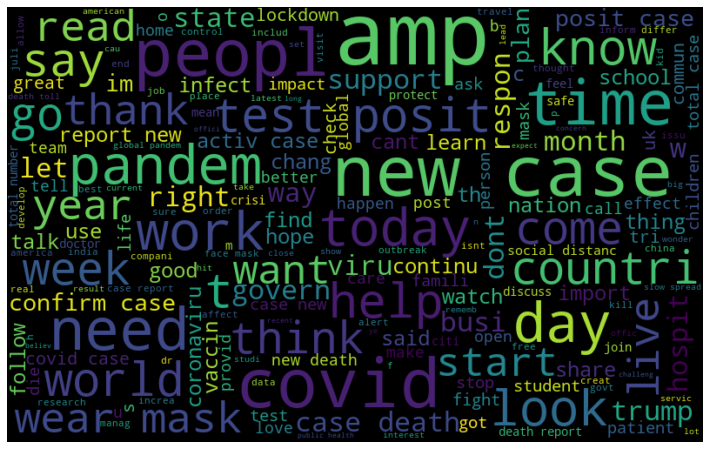

In [ ]:
# visualize the frequent words => Stemming
all_words = " ".join([sentence for sentence in dfCln['NeWclean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

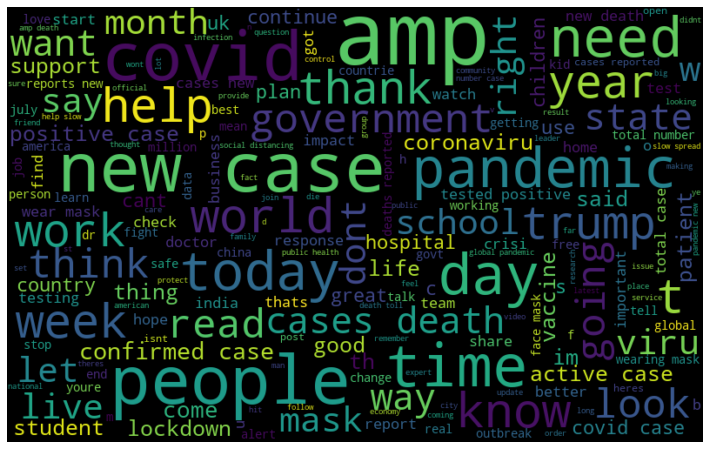

In [ ]:
# visualize the frequent words => without stemming
all_words = " ".join([sentence for sentence in dfCln['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dfCln.to_pickle("corpus.pkl")

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dfCln)):
    print(i)
    title = re.sub('[^a-zA-Z]', ' ', dfCln['clean_tweet'][i])
    title = title.lower()
    title = title.split()
    #title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    corpus.append(title)

In [ ]:
corpus 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer().fit(corpus)

In [ ]:
count_tokens=tfidf.get_feature_names()
count_tokens

In [ ]:
article_vect = tfidf.transform(corpus)

In [ ]:
df_tfidf_vect=pd.DataFrame(data=article_vect.toarray(),columns=count_tokens)
df_tfidf_vect

In [ ]:
df_tfidf_vect.head(5)

In [ ]:
df_tfidf_vect['smell']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
# feature extraction
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=70, stop_words='english')
bow = bow_vectorizer.fit_transform(dfCln['NeWclean_tweet'])

In [ ]:
print(DataFrame(bow.A, columns=bow_vectorizer.get_feature_names()).to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
bow_vectorizer1 = TfidfVectorizer(max_df=0.90, min_df=2, max_features=70, stop_words='english')
bow1 = bow_vectorizer1.fit_transform(dfCln['NeWclean_tweet'])

In [ ]:
article_vect1 = countTweet.transform(corpus)

In [ ]:
df_Count_vect=pd.DataFrame(data=bow1.A,columns=bow_vectorizer1.get_feature_names()).to_string()
df_Count_vect

In [ ]:
df_Count_vect['smell'] 